In [2]:
from dataset import DataFolder
import glob
from mmengine.config import Config

cfg = Config.fromfile('config/cryoPoint.py')
train_partA_image = list(glob.glob(cfg.data.train_partA_image))
print(len(train_partA_image))

# partA_image = []

# for i in range(len(train_partA_image)):
#    if 'denoised'  in train_partA_image[i]:
#       partA_image.append(train_partA_image[i])
 
# print('# training with', len(partA_image), 'image pairs')
train_dataset = DataFolder(cfg, train_partA_image ,'test')

2834


In [3]:
value=train_dataset[641]

/root/autodl-tmp/datasets/train_dataset/10077/train/images/sb1_210512 pos 1031 3-2_1.jpg
/root/autodl-tmp/datasets/train_dataset/10077/train/images/sb1_210512 pos 1031 3-2_1.jpg
sb1_210512 pos 1031 3-2_1.csv
/root/autodl-tmp/datasets/train_dataset/10077/train/masks/sb1_210512 pos 1031 3-2_1_mask.jpg


In [11]:
print(value[5].shape)

torch.Size([2])


In [10]:
points=value[2]
print(points)

tensor([[181.2500, 538.7500],
        [538.7500, 791.0000],
        [481.7500,  89.0000],
        [921.0000, 441.0000],
        [807.0000, 766.2500],
        [106.7500, 270.2500],
        [423.0000, 126.2500],
        [624.0000,  33.7500],
        [913.7500, 179.5000],
        [673.7500, 565.2500],
        [403.5000, 353.7500],
        [876.5000, 681.0000],
        [371.5000, 935.0000],
        [305.7500, 377.0000],
        [314.7500, 156.5000],
        [362.7500, 480.0000],
        [492.5000, 698.7500],
        [713.0000, 410.7500],
        [201.0000, 773.2500],
        [579.5000, 570.7500],
        [698.7500, 762.7500],
        [832.0000,  97.7500],
        [805.2500, 945.7500],
        [965.2500, 229.2500],
        [540.5000, 135.0000],
        [618.7500, 739.5000],
        [547.5000, 647.0000],
        [ 81.7500, 967.0000],
        [489.0000, 778.7500],
        [327.0000, 542.2500],
        [179.5000, 471.0000],
        [369.7500, 165.2500],
        [298.7500, 240.0000],
        [4

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


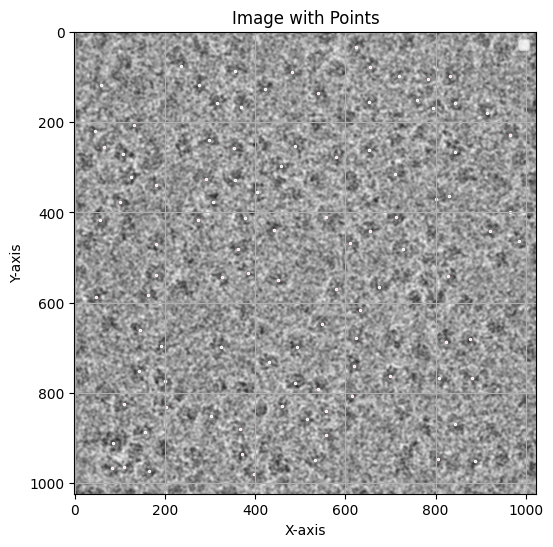

In [11]:
import torch
import matplotlib.pyplot as plt
import numpy as np

image=value[0]
gray_image = image[0,  :, :]
image_np = gray_image.numpy()

# 绘制图像
plt.figure(figsize=(6, 6))
plt.imshow(image_np, cmap='gray')

# 标注点
x_coords = [point[0] for point in points]
y_coords = [point[1] for point in points]
plt.scatter(x_coords, y_coords, c='red', s=2, edgecolor='white')  # 红色点，带白色边框以增强可见性


plt.title("Image with Points")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.legend()
plt.grid(True)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[[[6269.0, 5149.0], [3934.0, 5549.0], [1407.0, 4270.0], [7372.0, 5789.0], [1791.0, 3918.0], [5405.0, 4941.0], [2511.0, 5197.0], [3534.0, 3662.0], [3422.0, 2527.0], [6908.0, 1519.0], [6812.0, 2719.0], [4062.0, 991.0], [4190.0, 2639.0], [5997.0, 4510.0], [4046.0, 4653.0], [2831.0, 6764.0], [1199.0, 3086.0], [2367.0, 4030.0], [6908.0, 1247.0], [304.0, 6524.0], [160.0, 5549.0], [2383.0, 608.0], [4734.0, 1919.0], [1007.0, 6381.0], [2015.0, 3486.0], [2671.0, 3230.0], [6924.0, 4733.0], [2303.0, 4590.0], [6892.0, 5325.0], [288.0, 2287.0], [5053.0, 272.0], [4030.0, 4861.0], [1951.0, 4829.0], [720.0, 5085.0], [6381.0, 4094.0], [3678.0, 2703.0], [4750.0, 3390.0], [464.0, 1311.0], [3630.0, 576.0], [2671.0, 5373.0], [512.0, 2671.0], [5181.0, 4350.0], [3214.0, 5133.0], [3102.0, 3390.0], [1887.0, 6556.0], [6285.0, 2271.0], [6764.0, 1711.0], [6796.0, 592.0], [4893.0, 4158.0], [1791.0, 2047.0], [2894.0, 2031.0], [6493.0, 5213.0], [3070.0, 975.0], [2511.0, 2782.0], [4574.0, 3470.0], [5389.0, 1807.0], [2

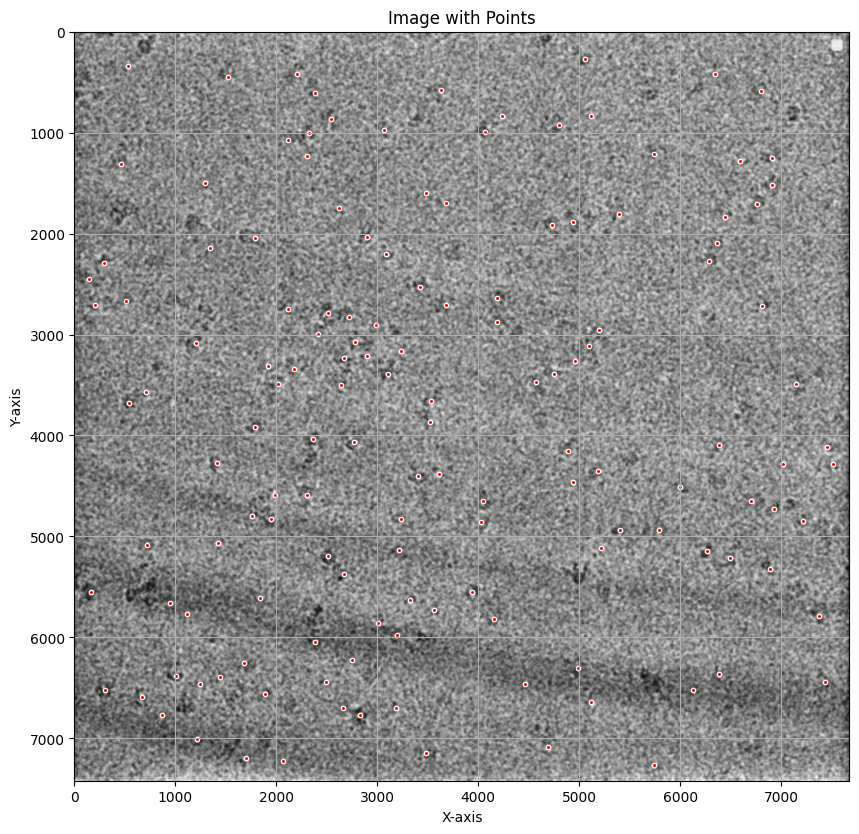

In [18]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from skimage import io
import json
import glob

files='/root/autodl-tmp/SFS_Joint_test/10028/denoised/061.jpg'
# 读取原来的图像
image = io.imread(files , as_gray=True)
# 标注的点数据
with open('/root/autodl-tmp/SFS_Joint_test/10028/points/061.json', 'r') as file:
    data = json.load(file)

data_points = data['TAP_ICP47_JF0216_2264.csv']
print((data_points))

# 绘制图像
plt.figure(figsize=(10, 10))
plt.imshow(image, cmap='gray')

# 标注点
x_coords = [point[0] for point in data_points[0]]
y_coords = [point[1] for point in data_points[0]]
plt.scatter(x_coords, y_coords, c='red', s=10, edgecolor='white')  # 红色点，带白色边框以增强可见性


plt.title("Image with Points")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.legend()
plt.grid(True)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


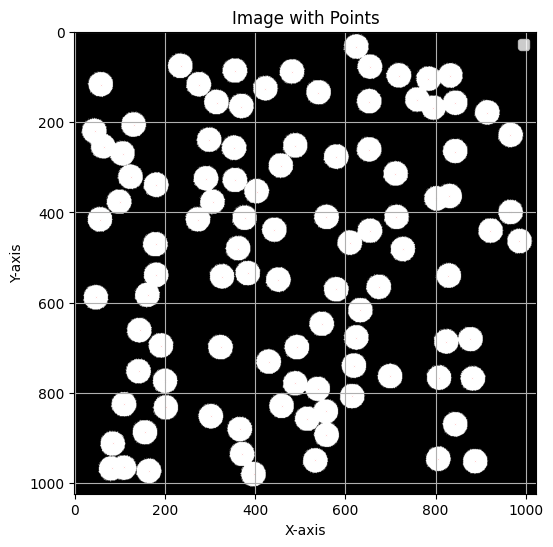

In [12]:
mask = value[-3].numpy()

# 绘制图像
plt.figure(figsize=(6, 6))
plt.imshow(mask, cmap='gray')

x_coords = [point[0] for point in points]
y_coords = [point[1] for point in points]
plt.scatter(x_coords, y_coords, c='red', s=2, edgecolor='white')  # 红色点，带白色边框以增强可见性

plt.title("Image with Points")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.legend()
plt.grid(True)
plt.show()

验证测试集

In [2]:
from PIL import Image

transform = A.Compose([
    A.Resize(height=1024, width=1024, p=1),
    A.PadIfNeeded(min_height=None, min_width=None, pad_height_divisor=cfg.prompter.space,
                  pad_width_divisor=cfg.prompter.space, position="top_left", p=1),
    A.Normalize(),
    ToTensorV2()
], p=1)

def process_files(files):
    for file in tqdm(files):
        img = io.imread(file)

        image = transform(image=img)['image'].unsqueeze(0).to(device)
        image = image.repeat(1,3, 1, 1)

        points, scores, classes, masks = predict(
            model,
            image,
            ori_shape=img.shape[:2],
            nms_thr=cfg.test.nms_thr,
            filtering=cfg.test.filtering
        )

        # 保存mask
        # mask = masks.cpu().numpy()
        # mask = mask.astype(np.uint8)
        # for i, mask in enumerate(masks):

        mask = masks.astype(np.uint8)
        mask = mask * 255
        mask = Image.fromarray(mask)
        mask.save(f'../segmentor/prompts/{file.split("/")[-3]}/{file.split("/")[-1][:-4]}.png')
        # print(masks[0][0])

        save_content = np.concatenate([points , classes[:, None]], axis=-1)

        np.save(
            f'../segmentor/prompts/{file.split("/")[-3]}/{file.split("/")[-1][:-4]}',
            save_content
        )



mkdir(f'../segmentor/prompts/10028')
files=glob.glob('../segmentor/datasets/test_dataset/10028/images/061.jpg')
# files=glob.glob('../segmentor/datasets/test_dataset/10532/images/FoilHole_24136295_Data_24136382_24136384_20200224_020538_Fractions_patch_aligned.jpg')
process_files(files)


100%|██████████| 1/1 [00:01<00:00,  1.75s/it]


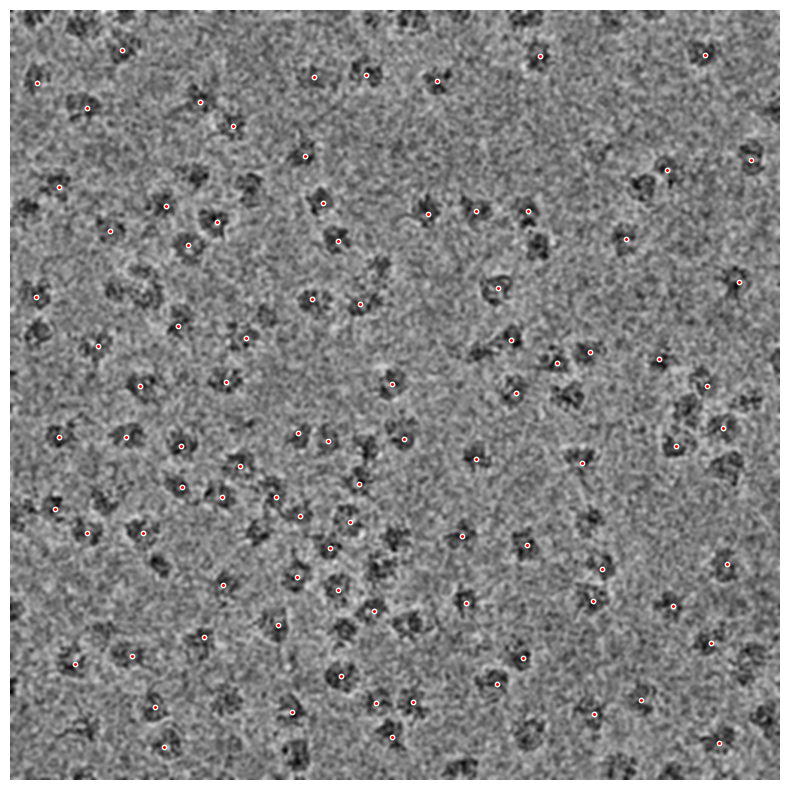

In [8]:
import matplotlib.pyplot as plt
from skimage import io
import numpy as np
import cv2
import albumentations as A
import json
import glob

files=glob.glob('../segmentor/datasets/test_dataset/10028/images/061.jpg')


# 读取原来的图像
image = io.imread(files[0] , as_gray=True)
# 标注的点数据
with open('datasets/test_dataset/10028/10028.json', 'r') as file:
    data = json.load(file)

data_points = data['061.csv']
# resize  图像和点
transform = A.Compose([
    A.Resize(height=1024, width=1024, p=1),
], p=1 , keypoint_params=A.KeypointParams(format='xy'))

transformed  = transform(image=image, keypoints=data_points[0])
image = transformed['image']
data_points = transformed['keypoints']

plt.figure(figsize=(10, 10))
plt.imshow(image, cmap='gray')
plt.axis("off")  # 隐藏坐标轴


# 标注点
x_coords = [point[0] for point in data_points]
y_coords = [point[1] for point in data_points]
plt.scatter(x_coords, y_coords, c='red', s=10, edgecolor='white')  # 红色点，带白色边框以增强可见性


# 训练得到的点
points = np.load('../segmentor/prompts/10028/061.npy')
x = [point[0] for point in points]
y = [point[1] for point in points]
plt.scatter(x, y, c='green', s=10, edgecolor='white')


plt.show()

In [6]:
print(len(data_points))

90


In [4]:
import torch
dir_checkpoint='pretrained/unet_L2_v0.2.2.sav'
checkpoint = torch.load(dir_checkpoint )
print(checkpoint['dec4.0.weight'])

# # 提取 state_dict
# state_dict = checkpoint  # 如果键是 'state_dict'

# # 查看每一层的参数
# for name, param in state_dict.items():
#     print(f"Layer: {name}, Shape: {param}")


tensor([[[[-2.1582e-02, -1.1953e-02, -2.2355e-02],
          [-4.3222e-03, -2.0697e-02, -1.4510e-02],
          [ 1.3947e-02,  2.7331e-02,  2.7589e-04]],

         [[ 1.6397e-02,  3.0124e-02,  1.0981e-02],
          [ 6.3318e-03,  1.9389e-02,  2.0459e-03],
          [-1.4796e-02,  2.4719e-03,  5.2511e-03]],

         [[ 1.5141e-02, -8.8775e-03,  1.0266e-02],
          [ 4.9985e-03,  7.9794e-03,  1.2620e-02],
          [-9.1309e-03,  1.0644e-02,  9.7666e-03]],

         ...,

         [[ 1.8158e-05, -4.1055e-03,  4.2059e-03],
          [ 1.9049e-02,  1.9643e-03, -3.1281e-02],
          [-1.7376e-03,  9.2529e-03, -6.1714e-04]],

         [[-1.5934e-02,  9.1242e-03,  4.7032e-03],
          [ 2.3075e-02,  7.8187e-03,  2.6291e-02],
          [ 3.3024e-02,  1.9957e-02, -1.3141e-02]],

         [[ 1.8140e-02, -4.0068e-03, -5.0131e-03],
          [ 8.7530e-03,  1.2860e-02, -2.4176e-02],
          [-7.1988e-03, -1.4379e-02, -7.9859e-03]]],


        [[[-1.2064e-02, -2.2362e-02,  6.4319e-03],
  

In [3]:
from models.u_net import *

Unet_decoder=Unet_encoder()
Unet_decoder.init_weights("pretrained/unet_L2_v0.2.2.sav")
# 打印每一层的参数
for name, param in Unet_decoder.named_parameters():
    print(f"Layer: {name}, Shape: {param.shape}")
    # if name == 'dec4.0.weight':
    #     print(f"Layer: {name}, Shape: {param.shape}")
    #     print(param)  # 打印该层的权重张量


Layer: enc1.0.weight, Shape: torch.Size([48, 1, 11, 11])
Layer: enc1.0.bias, Shape: torch.Size([48])
Layer: enc2.0.weight, Shape: torch.Size([48, 48, 3, 3])
Layer: enc2.0.bias, Shape: torch.Size([48])
Layer: enc3.0.weight, Shape: torch.Size([48, 48, 3, 3])
Layer: enc3.0.bias, Shape: torch.Size([48])
Layer: enc4.0.weight, Shape: torch.Size([48, 48, 3, 3])
Layer: enc4.0.bias, Shape: torch.Size([48])
Layer: enc5.0.weight, Shape: torch.Size([48, 48, 3, 3])
Layer: enc5.0.bias, Shape: torch.Size([48])
Layer: enc6.0.weight, Shape: torch.Size([48, 48, 3, 3])
Layer: enc6.0.bias, Shape: torch.Size([48])
